In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
co2_data_df = pd.read_csv('FuelConsumption.csv')
co2_data_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
len(co2_data_df)

1067

In [4]:
co2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [3]:
co2_features = co2_data_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
co2_features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


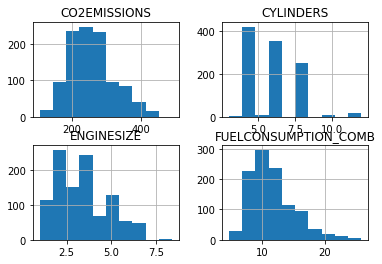

In [5]:
#Distribution check
co2_features.hist();

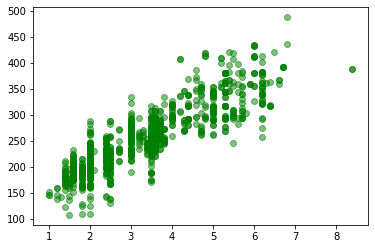

In [11]:
#EDA:
plt.scatter(co2_data_df[['ENGINESIZE']], co2_data_df[['CO2EMISSIONS']], alpha=0.5, color = 'g')

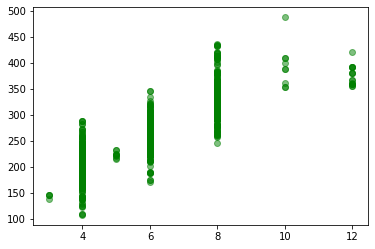

In [12]:
plt.scatter(co2_data_df[['CYLINDERS']], co2_data_df[['CO2EMISSIONS']], alpha=0.5, color = 'g')

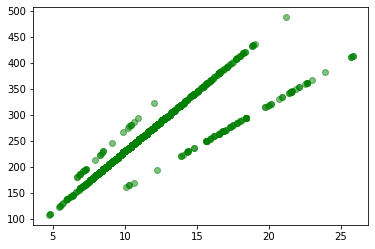

In [13]:
plt.scatter(co2_data_df[['FUELCONSUMPTION_COMB']], co2_data_df[['CO2EMISSIONS']], alpha=0.5, color = 'g')

In [15]:
#without train test split - we split into train and test
selection = np.random.rand(len(co2_features)) < 0.8
train = co2_features[selection]
test = co2_features[~selection]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
4,3.5,6,10.6,244
7,3.7,6,11.1,255
8,3.7,6,11.6,267
13,5.9,12,15.6,359
20,2.0,4,10.0,230
...,...,...,...,...
1050,3.6,6,12.1,278
1053,2.0,4,10.7,246
1057,2.5,5,10.1,232
1061,3.2,6,11.2,258


In [28]:
from sklearn import linear_model
lm_model = linear_model.LinearRegression()


train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

lm_model.fit (train_x, train_y)
print(lm_model.coef_)
print(lm_model.intercept_)
m = lm_model.coef_
c = lm_model.intercept_

[[39.71020994]]
[123.64511937]


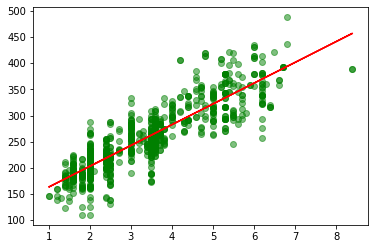

In [34]:
#Plot regression line:
plt.scatter(train_x, train_y, alpha=0.5, color = 'g')
plt.plot(train_x, m*(train_x)+c, color = 'r');

In [38]:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

test_y_hat = lm_model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 20.30
Residual sum of squares (MSE): 693.11
R2-score: 0.77
